##Identitas



*   Nama : Yohanes Egi Pratama Yudoutomo
*   Asal : Lampung




##Deskripsi Submission

* Dataset harus dibagi menjadi train set dan validation set.
* Ukuran validation set harus 40% dari total dataset (data * * training memiliki 1314 sampel, dan data validasi sebanyak  874 sampel).
* Harus mengimplementasikan augmentasi gambar.
* Menggunakan image data generator.
* Model harus menggunakan model sequential.
* Pelatihan model tidak melebihi waktu 30 menit.
* Program dikerjakan pada Google Colaboratory.
* Akurasi dari model minimal 85%.

##Import Library

In [109]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [110]:
!pip install split_folders
import splitfolders

In [111]:
print('Tensor = ',tf.__version__)
print('Numpy = ',np.__version__)

Tensor =  2.4.1
Numpy =  1.19.5


##Load Data

In [112]:
#Load Data
!wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip -O rockpaperscissors.zip


--2021-04-09 07:18:07--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M   723KB/s    in 3m 38s  

2021-04-09 07:21:46 (1.41 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [113]:
import zipfile,os
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [114]:
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors/data", seed=1, ratio=(.8, .2))

Copying files: 2188 files [00:01, 1200.76 files/s]


In [116]:
base_data = '/tmp/rockpaperscissors/data'
data_train = os.path.join(base_data, 'train')
data_validation = os.path.join(base_data, 'val')

In [117]:
train_rock = os.path.join(data_train, 'rock') 
train_scissors = os.path.join(data_train, 'scissors')
train_paper = os.path.join(data_train, 'paper')

validation_rock = os.path.join(data_validation, 'rock')
validation_scissors = os.path.join(data_validation, 'scissors')
validation_paper = os.path.join(data_validation, 'paper')

##Image Data Generator

In [118]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=20,
                                    horizontal_flip=True,
                                    shear_range = 0.2,
                                    zoom_range=0.2,
                                    brightness_range=None,
                                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=20,
                                    horizontal_flip=True,
                                    shear_range = 0.2,
                                    brightness_range=None,
                                    fill_mode = 'nearest')

In [119]:
train_generator = train_datagen.flow_from_directory(
                                                    data_train,
                                                    target_size=(150,150), 
                                                    batch_size=32,
                                                    shuffle = True,
                                                    class_mode='categorical',
                                                    color_mode='rgb')
 
validation_generator = test_datagen.flow_from_directory(
                                                        data_validation,
                                                        target_size=(150, 150), 
                                                        batch_size=32,
                                                        shuffle = True, 
                                                        class_mode='categorical',
                                                        color_mode='rgb')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


##Model Sequential

In [120]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 15, 15, 128)      

In [121]:
model.compile(optimizer = 'RMSprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [122]:
learning =  model.fit(
                      train_generator,
                      steps_per_epoch=25,  
                      epochs=20,
                      validation_data=validation_generator, 
                      validation_steps=5,  
                      verbose=2)

Epoch 1/20
25/25 - 43s - loss: 1.3898 - accuracy: 0.3384 - val_loss: 1.0574 - val_accuracy: 0.4938
Epoch 2/20
25/25 - 41s - loss: 0.9986 - accuracy: 0.5337 - val_loss: 0.6076 - val_accuracy: 0.7875
Epoch 3/20
25/25 - 41s - loss: 0.6223 - accuracy: 0.7351 - val_loss: 0.4046 - val_accuracy: 0.8625
Epoch 4/20
25/25 - 41s - loss: 0.4471 - accuracy: 0.8378 - val_loss: 0.8244 - val_accuracy: 0.6187
Epoch 5/20
25/25 - 41s - loss: 0.4027 - accuracy: 0.8542 - val_loss: 0.3060 - val_accuracy: 0.8938
Epoch 6/20
25/25 - 42s - loss: 0.3199 - accuracy: 0.8750 - val_loss: 0.1936 - val_accuracy: 0.9312
Epoch 7/20
25/25 - 42s - loss: 0.2917 - accuracy: 0.8963 - val_loss: 0.1354 - val_accuracy: 0.9625
Epoch 8/20
25/25 - 41s - loss: 0.2399 - accuracy: 0.9176 - val_loss: 0.1683 - val_accuracy: 0.9500
Epoch 9/20
25/25 - 42s - loss: 0.2343 - accuracy: 0.9200 - val_loss: 0.1081 - val_accuracy: 0.9688
Epoch 10/20
25/25 - 41s - loss: 0.2106 - accuracy: 0.9287 - val_loss: 0.1645 - val_accuracy: 0.9312
Epoch 11/

Saving 7cNxwgrraQGeA1LA.png to 7cNxwgrraQGeA1LA.png
7cNxwgrraQGeA1LA.png
rock


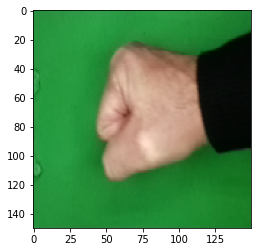

In [123]:
 import matplotlib.pyplot as plt
 uploaded = files.upload()
 for fn in uploaded.keys():
 
  
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  hasil = np.argmax(classes)
  
  print(fn)
  if hasil == 0:
    print('paper')

  elif hasil == 1:
    print('rock')

  elif hasil == 2:
    print('scissors')

##Accuracy

In [124]:
score = model.evaluate(train_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

55/55 [==============================] - 32s 576ms/step - loss: 0.0712 - accuracy: 0.9754
Loss: 0.0712
Accuracy: 0.9754


In [126]:
score = model.evaluate(validation_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

14/14 [==============================] - 8s 554ms/step - loss: 0.0438 - accuracy: 0.9909
Loss: 0.0438
Accuracy: 0.9909


##Conclusion

Submission Course Dicoding kelas Machine learning Pemula, Studi kasus klasifikasi gambar gunting batu kertas dengan membuat Program Jaringan Saraf Tiruan. hasil diketahui akurasi diatas 85% dan sudah dicoba melakukan proses input gambar berhasil melakukan klasifikasi bahwa gambar tersebut adalah rock 

* Terima Kasih